# Homework 4: Data Visualization
- **Name**:  Shuoling Li
- **UB Username**: shuoling
- **UB Person Number**:  50220520

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [19]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import csv
import pandas as pd
import seaborn as sns
#file = pd.read_csv("scatter_data.csv")
#print(file)
#from collections import defaultdict 
import matplotlib.pyplot as plt
import matplotlib.patches as patches


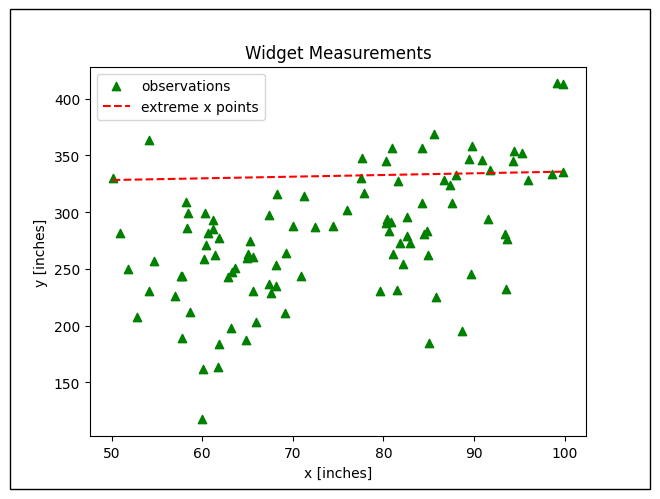

In [20]:
# It's OK to break up your code into multiple cells.

#read data, append x,y into data
data = []
with open("scatter_data.csv") as f:
    for line in f:
        if not line.startswith("%"):
            x, y = line.split(",")
            data.append((float(x), float(y)))
x = [d[0] for d in data]
y = [d[1] for d in data]

plt.scatter(x, y, marker="^", color="green", label="observations")
xmin, xmax = min(x), max(x)
plt.plot([xmin, xmax], [y[0], y[-1]], linestyle="--", color="red", label="extreme x points")

# Set plot title and axis labels
plt.title("Widget Measurements")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")

#Add border
fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])
#Add a legend and show plot
plt.legend()
plt.show()

### Problem 2 - Histogram

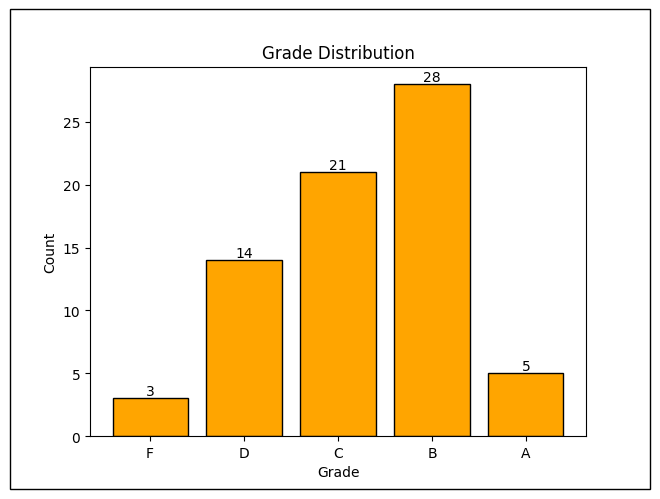

In [21]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

#read data, append students' grades into grade
grade = []
with open("student_grades.csv") as f:
    for line in f:
        if not line.startswith("%"):
            x, y = line.split(",")
            grade.append(float(y))
#print(len(grade))
#print(grade)

#create a dictionary, then count the students for each grade level.
dic = {'F':0,'D':0,'C':0,'B':0,'A':0}
for i in grade:
    if i >=90 and i <=100:
        dic['A'] +=1
    elif i >= 80 and i <90:
        dic['B'] +=1
    elif i >=70 and i < 80:
        dic['C'] +=1
    elif i >= 60 and i < 70:
        dic['D'] +=1
    elif i < 60:
        dic['F']+=1
#print(dic)
#print(dic.values())

#get dic keys and values
grade_labels = list(dic.keys())
grade_counts = list(dic.values())


#plot
plt.bar(grade_labels, grade_counts, color='orange', edgecolor='black')

for i, count in enumerate(grade_counts):
    plt.text(grade_labels[i], count, str(count), ha='center', va='bottom')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

#Add border
fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])

#show plot
plt.show()

In [22]:
# It's OK to break up your code into multiple cells.

### Problem 3 - Barplot and Boxplot in the Same Figure

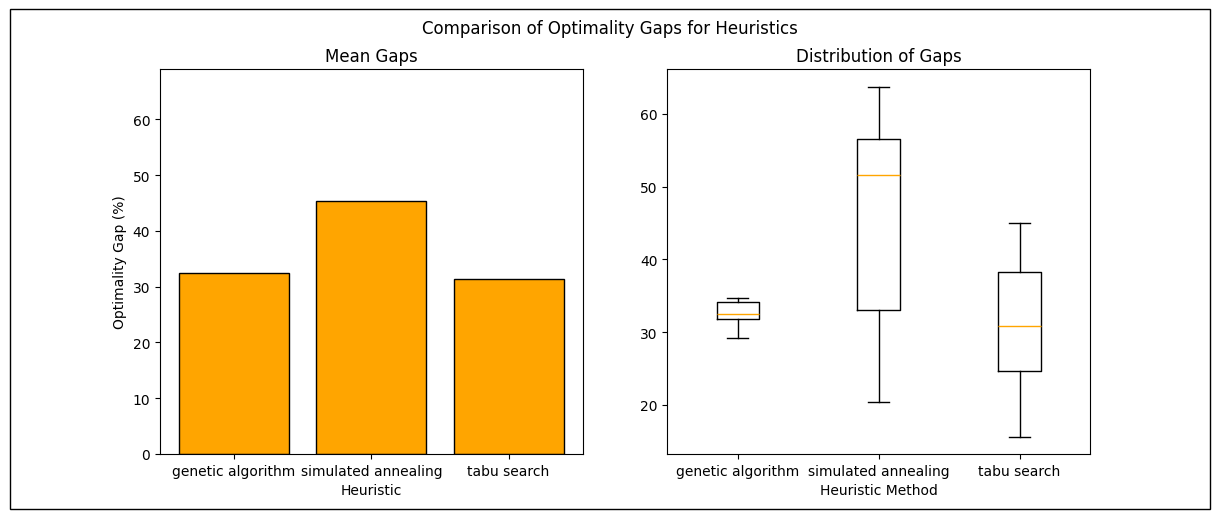

In [23]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import numpy as np
# read csv named as data, then add column names tot the corresponding column.
data = pd.read_csv('solution_data.csv', comment='%', header=None)
col_names = ['Problem', 'SolnMethod', 'Value']
data = pd.DataFrame(data)
data.columns = col_names

#caculate the gaps
optimal_data = data[data['SolnMethod'] == 'optimal']
optimal_ofv = optimal_data.groupby('Problem')['Value'].mean()
heuristic_data = data[data['SolnMethod'] != 'optimal']
heuristic_ofv = heuristic_data.groupby(['Problem', 'SolnMethod'])['Value'].mean()
avg_gaps = ((optimal_ofv - heuristic_ofv) / optimal_ofv) * 100

avg_gaps = avg_gaps.reset_index()
#print(Gaps)

#create dataframe use pd
barplot_data = pd.DataFrame({
    'Heuristic': avg_gaps['SolnMethod'],
    'Optimality Gap': avg_gaps['Value']
})


avg_gaps = avg_gaps.reset_index()
heuristics_to_select = ['genetic algorithm', 'simulated annealing', 'tabu search']
heuristic_gaps = barplot_data[barplot_data['Heuristic'].isin(heuristics_to_select)]
heuristic_gaps= heuristic_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

#create two subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")


#barplot
axes[0].bar(heuristic_gaps['Heuristic'], heuristic_gaps['Optimality Gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")
axes[0].set_ylim([0, 69])


#boxplot
boxplot_data = [avg_gaps[avg_gaps['SolnMethod'] == method]['Value'] for method in avg_gaps['SolnMethod'].unique()]

boxplot = axes[1].boxplot(boxplot_data, patch_artist=False, medianprops={'color': 'orange'})
labels = avg_gaps['SolnMethod'].unique()
x = range(1,len(labels)+1)
axes[1].set_xticks(x)

axes[1].set_xticklabels(labels, rotation=0, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Distribution of Gaps")



#add border and show the plot
fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])

plt.show()

In [24]:
# It's OK to break up your code into multiple cells.

--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**: https://www.tutorialspoint.com/how-to-create-a-seaborn-correlation-heatmap-in-python
- **URL of Sample Data**:  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

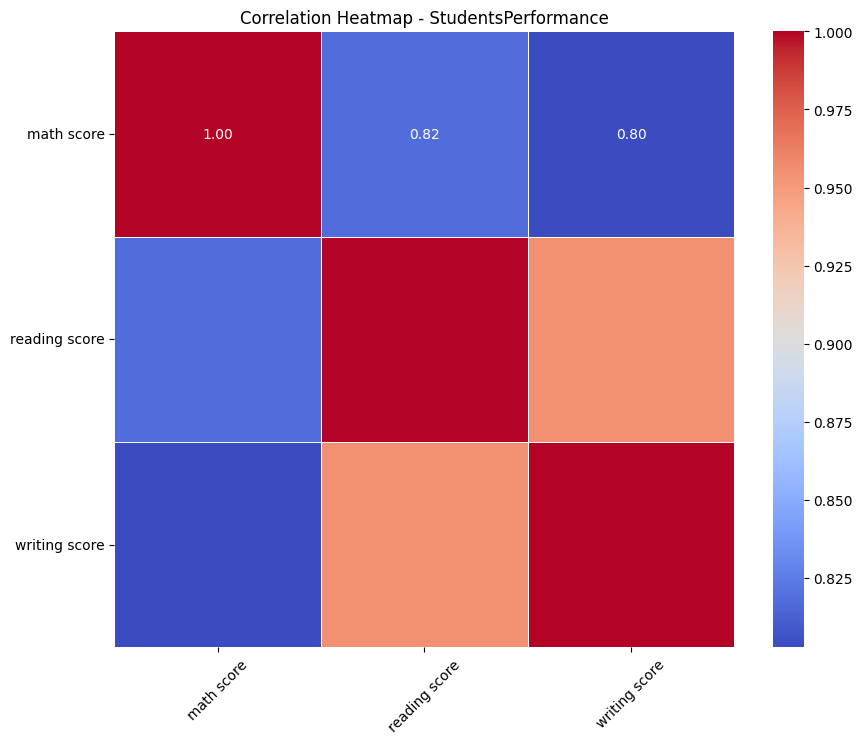

In [25]:
# It's OK to break up your code into multiple cells.
#read csv named as df
df = pd.read_csv('StudentsPerformance.csv')
print(df)
#remove null value
df.isnull().sum()
#print (df.shape)


x = df['math score']
y = df['reading score']
z = df['writing score']

#select the numeric values
df1 = {
    'math score': x,
    'reading score': y,
    'writing score': z
}

new_df = pd.DataFrame(df1)
# use.corr() to create the coora
correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap - StudentsPerformance")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()
#The image is a heatmap that shows the correlation between students' scores in different subjects. 
#The darker the red, the higher the correlation. In this case, there is a strong correlation between 
#math and reading scores, as well as between reading and writing scores. 
#However, there is a weak correlation between math and writing scores.

In [26]:
# It's also OK to include comments, 
# either in Markdown or as Python code comments.


In [27]:
'''
mu = df['math score'].mean()
mu
rng = np.random.default_rng(19680801)
sigma = df['math score'].std()
sigma
x = rng.normal(loc=mu, scale=sigma, size=420)

num_bins = 42

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

fig.tight_layout()
plt.show()
'''

"\nmu = df['math score'].mean()\nmu\nrng = np.random.default_rng(19680801)\nsigma = df['math score'].std()\nsigma\nx = rng.normal(loc=mu, scale=sigma, size=420)\n\nnum_bins = 42\n\nfig, ax = plt.subplots()\n\nn, bins, patches = ax.hist(x, num_bins, density=True)\n\ny = ((1 / (np.sqrt(2 * np.pi) * sigma)) *\n     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))\nax.plot(bins, y, '--')\nax.set_xlabel('Value')\nax.set_ylabel('Probability density')\nax.set_title('Histogram of normal distribution sample: '\n             fr'$\\mu={mu:.0f}$, $\\sigma={sigma:.0f}$')\n\nfig.tight_layout()\nplt.show()\n"

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 

In [33]:
'''
numeric_columns = df[['math score', 'reading score', 'writing score']]
sns.pairplot(numeric_columns)
plt.show()
'''


"\nnumeric_columns = df[['math score', 'reading score', 'writing score']]\nsns.pairplot(numeric_columns)\nplt.show()\n"

In [34]:
'''
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='test preparation course', hue='gender', palette='Set1')
plt.title('Count of Test Preparation Course Completion by Gender')
plt.xlabel('Test Preparation Course Completion')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
'''

"\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='test preparation course', hue='gender', palette='Set1')\nplt.title('Count of Test Preparation Course Completion by Gender')\nplt.xlabel('Test Preparation Course Completion')\nplt.ylabel('Count')\nplt.legend(title='Gender')\nplt.show()\n"

In [35]:
'''
markers = {'male': 'o', 'female': 's'}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', style='gender', markers=markers)
plt.title('Scatter Plot of Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = {'male': 'Male', 'female': 'Female'}
plt.legend(handles, [legend_labels[label] for label in labels], title='Gender')

plt.show()
'''
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py

"\nmarkers = {'male': 'o', 'female': 's'}\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=df, x='math score', y='reading score', hue='gender', style='gender', markers=markers)\nplt.title('Scatter Plot of Math Score vs Reading Score')\nplt.xlabel('Math Score')\nplt.ylabel('Reading Score')\n\nhandles, labels = plt.gca().get_legend_handles_labels()\nlegend_labels = {'male': 'Male', 'female': 'Female'}\nplt.legend(handles, [legend_labels[label] for label in labels], title='Gender')\n\nplt.show()\n"